# Graphes de Calcul

In [34]:
class Node:
    def __init__(self, value, function=None, *args):
        self.value = value
        self.function = function
        self.args = args
        # Auto-computation of value
        if function is not None:
            vals = []
            for arg in args:
                if type(arg) == Node:
                    vals.append(arg.value)
                else:
                    vals.append(arg)
            self.value = function(*vals)
    def __repr__(self):
        if self.function is None:
            return str(self.value)
        else:
            args_str = ", ".join([str(arg) for arg in self.args])
            function_name = self.function.__qualname__
            return f"{function_name}({args_str})"
        

In [35]:
def add(x, y):
    return x + y

In [36]:
def mult(x, y):
    return x * y

In [37]:
x = Node(1.0)
y = Node(2.0)
z = Node(None, add, x, y)

In [38]:
x

1.0

In [39]:
y

2.0

In [40]:
z

add(1.0, 2.0)

In [41]:
c = Node(1.0)
w = Node(None, mult, c, z)
w

mult(1.0, add(1.0, 2.0))

In [42]:
w.value

3.0

In [43]:
import graphviz  

def graph(end_node):
    dot = graphviz.Digraph()
    todo = [end_node]
    while todo:
        node = todo.pop()
        id_ = str(id(node))
        label = node.function.__qualname__ if node.function else str(node.value) 
        dot.node(id_, label)
        for arg in node.args:
            dot.node(str(id(arg)), node.function.__qualname__ or str(node.value))
            dot.edge(id_, str(id(arg)))
        todo.extend(node.args)
    return dot

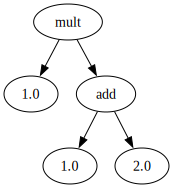

In [44]:
graph(w)

In [45]:
x, y, c

(1.0, 2.0, 1.0)

### Différenciation Directe

In [46]:
x.d_value = 0.1
y.d_value = -0.02
c.d_value = 0.0

In [47]:
# Calculer w.d_value

In [48]:
def grad_add(x, y):
    return [1.0, 1.0]
    
def grad_mult(x, y):
    return [y, x]

grads = {add: grad_add, mult: grad_mult}

In [49]:
for l in zip([1, 2, 3], [4, 5, 6]):
    print(l)

(1, 4)
(2, 5)
(3, 6)


In [59]:
def compute_d_value(node):
    grad = grads[node.function]
    args_val = [n.value for n in node.args] # [x, y]
    print(f"[x, y]: {args_val}")
    g = grad(*args_val) # grad f(x, y)
    print(f"grad f(x, y): {g}")
    d_args_val = [n.d_value for n in node.args] # [dx, dy]
    print(f"[dx, dy]: {d_args_val}")
    d_value = sum([gi * dxi for gi, dxi in zip(g, d_args_val)]) # df/dx * dx + df/dy * dy
    print("d_value:", d_value)
    node.d_value = d_value

In [66]:
x.d_value = 1.0
y.d_value = 0.0
compute_d_value(z)
compute_d_value(w)
w.d_value # df/dx(1.0, 2.0)

[x, y]: [1.0, 2.0]
grad f(x, y): [1.0, 1.0]
[dx, dy]: [1.0, 0.0]
d_value: 1.0
[x, y]: [1.0, 3.0]
grad f(x, y): [3.0, 1.0]
[dx, dy]: [0.0, 1.0]
d_value: 1.0


1.0

In [67]:
x.d_value = 0.0
y.d_value = 1.0
compute_d_value(z)
compute_d_value(w)
w.d_value # df/dy(1.0, 2.0)

[x, y]: [1.0, 2.0]
grad f(x, y): [1.0, 1.0]
[dx, dy]: [0.0, 1.0]
d_value: 1.0
[x, y]: [1.0, 3.0]
grad f(x, y): [3.0, 1.0]
[dx, dy]: [0.0, 1.0]
d_value: 1.0


1.0

In [ ]:
grad_f_xy = [1.0, 1.0] # Yes!

## Différenciation Rétrograde 

(Backward Differentiation aka "Backprop")

**TODO**

## Différenciation Automatique avec PyTorch

In [15]:
import torch

In [16]:
x = torch.tensor(2.0, requires_grad=True)

In [17]:
y = x * x + 1.0

In [18]:
y

tensor(5., grad_fn=<AddBackward0>)

In [19]:
y.backward()

In [20]:
x.grad # dy/dx(2.0)

tensor(4.)

## Pytorch, le retour !

In [68]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(7.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)
w = (x + y) * z

In [69]:
w.backward()

In [71]:
x.grad

tensor(3.)

In [72]:
y.grad

tensor(3.)

In [73]:
z.grad

tensor(8.)